In [1]:
#snkjdf

In [4]:
os.getcwd()

'C:\\Users\\91898\\mlenv\\ipynbss'

In [5]:
import os
os.chdir('C:\\Users\\91898\\mlenv')

In [6]:
os.getcwd()

'C:\\Users\\91898\\mlenv'

 Gait Cycle Identified: Frame 13 to 38


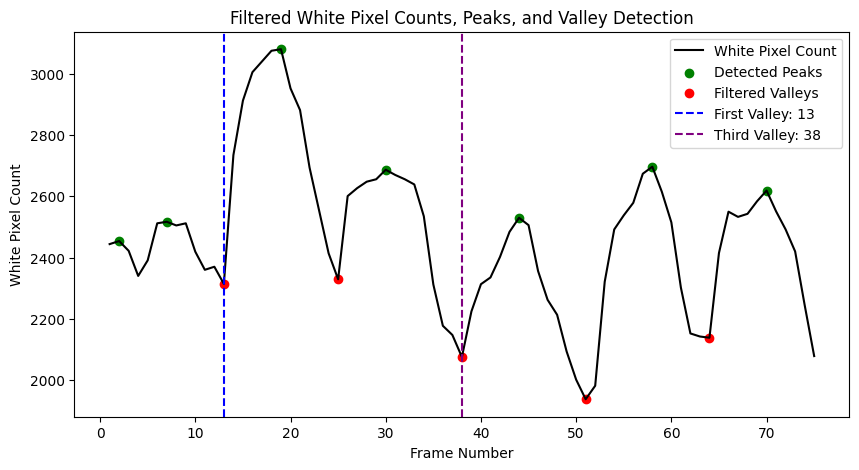

In [8]:
from scipy.signal import argrelextrema
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Folder paths
silhouette_folder = os.path.join("CASIA-a", "GaitDatasetA-silh", "GaitDatasetA-silh", "fyc", "00_1")
white_pixel_threshold = 150  # Minimum white pixel count for a frame to be considered

# Function to count white pixels in the lower half of the image
def count_white_pixels_lower_half(img):
    height, width = img.shape
    lower_half = img[height//2:, :]  # Extract the lower half
    return np.count_nonzero(lower_half)

# Read all frame files
image_files = sorted(os.listdir(silhouette_folder))

# Extract white pixel count for each frame
frame_pixel_counts = []
frame_numbers = []

for img_file in image_files:
    frame_path = os.path.join(silhouette_folder, img_file)
    img = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
    
    frame_number = int(os.path.splitext(img_file)[0].split('-')[-1])  # Extract numeric frame number
    white_pixel_count = count_white_pixels_lower_half(img)

    if white_pixel_count >= white_pixel_threshold:  # Only keep significant frames
        frame_pixel_counts.append(white_pixel_count)
        frame_numbers.append(frame_number)

frame_pixel_counts_np = np.array(frame_pixel_counts)

# Compute max pixel count and set a threshold
max_pixel_count = np.max(frame_pixel_counts_np)
pixel_count_threshold = 0.2 * max_pixel_count  # 20% of max pixel count

# Ignore peaks/valleys below this threshold
valid_indices = [i for i in range(len(frame_pixel_counts)) if frame_pixel_counts[i] > pixel_count_threshold]

# Detect **peaks** (local maxima)
peak_indices = argrelextrema(frame_pixel_counts_np, np.greater, order=3)[0]
peak_indices = [i for i in peak_indices if i in valid_indices]  # Filter peaks

# Detect **valleys** (local minima)
valley_indices = argrelextrema(frame_pixel_counts_np, np.less, order=3)[0]
valley_indices = [i for i in valley_indices if i in valid_indices]  # Filter valleys

# Convert indices to actual frame numbers
peak_frames = [frame_numbers[i] for i in peak_indices]
valley_frames = [frame_numbers[i] for i in valley_indices]

# **Step 1: Remove False Start & End Valleys**
buffer_size = max(2, int(len(frame_pixel_counts) * 0.1))  # Ignore first & last 25% of frames
filtered_valley_frames = [v for v in valley_frames if frame_numbers.index(v) > buffer_size and frame_numbers.index(v) < len(frame_pixel_counts) - buffer_size]

# **Step 2: Select First and Third Valid Valley as Gait Cycle**
if len(filtered_valley_frames) >= 3:
    first_valley_frame = filtered_valley_frames[0]
    third_valley_frame = filtered_valley_frames[2]
    print(f" Gait Cycle Identified: Frame {first_valley_frame} to {third_valley_frame}")
else:
    print(" Not enough valid valleys detected to determine a gait cycle.")
    first_valley_frame, third_valley_frame = None, None

# **Step 3: Plot Results**
plt.figure(figsize=(10, 5))
plt.plot(frame_numbers, frame_pixel_counts, label="White Pixel Count", color='black')

# Mark peaks
plt.scatter(peak_frames, [frame_pixel_counts[frame_numbers.index(f)] for f in peak_frames], 
            color='green', label="Detected Peaks")

# Mark filtered valleys
plt.scatter(filtered_valley_frames, [frame_pixel_counts[frame_numbers.index(f)] for f in filtered_valley_frames], 
            color='red', label="Filtered Valleys")

# Mark first and third valley if they exist
if first_valley_frame and third_valley_frame:
    plt.axvline(x=first_valley_frame, color='blue', linestyle='--', label=f"First Valley: {first_valley_frame}")
    plt.axvline(x=third_valley_frame, color='purple', linestyle='--', label=f"Third Valley: {third_valley_frame}")

# Plot styling
plt.xlabel("Frame Number")
plt.ylabel("White Pixel Count")
plt.title("Filtered White Pixel Counts, Peaks, and Valley Detection")
plt.legend()
plt.show()


Extracted Angle: 0°
Initial Gait Cycle: Frame 9 to 34
Frame ignoring factor: 0.1


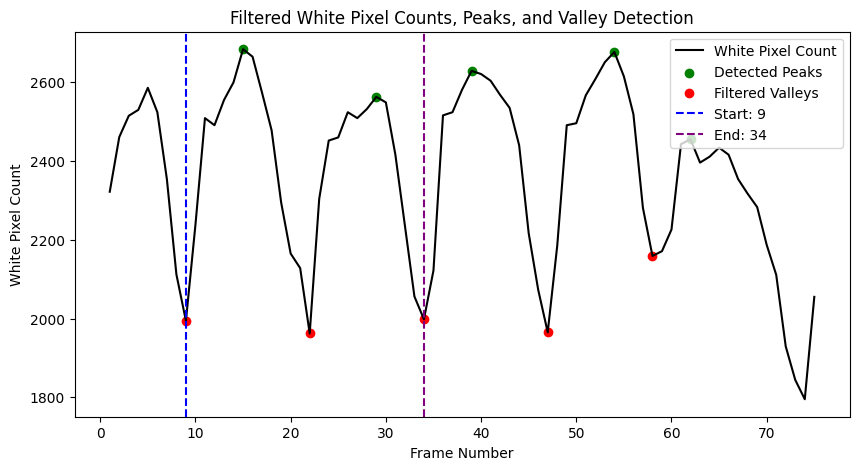

In [82]:
from scipy.signal import argrelextrema
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Folder paths
silhouette_folder = os.path.join("CASIA-a", "GaitDatasetA-silh", "GaitDatasetA-silh", "fyc", "00_4")
white_pixel_threshold = 150 # Minimum white pixel count for a frame to be considered

# Extract the folder name (last part of the path)
folder_name = os.path.basename(silhouette_folder)
# Extract angle from folder name
angle = folder_name.split('_')[0]  # Get the first part before '_'
# Convert to integer
angle = int(angle)
print(f"Extracted Angle: {angle}°")
frame_ignoring_factor=0.1
if(angle==45):
    frame_ignoring_factor=0.25

# Function to count white pixels in the lower half of the image
def count_white_pixels_lower_half(img):
    height, width = img.shape
    if angle == 45:
        lower_half = img[(height//2)+16:, :]  # Extract the lower half
    else:
        lower_half = img[(height//2):, :]
    return np.count_nonzero(lower_half)

# Read all frame files
image_files = sorted(os.listdir(silhouette_folder))

# Extract white pixel count for each frame
frame_pixel_counts = []
frame_numbers = []

for img_file in image_files:
    frame_path = os.path.join(silhouette_folder, img_file)
    img = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
    
    frame_number = int(os.path.splitext(img_file)[0].split('-')[-1])  # Extract numeric frame number
    white_pixel_count = count_white_pixels_lower_half(img)

    if white_pixel_count >= white_pixel_threshold:  # Only keep significant frames
        frame_pixel_counts.append(white_pixel_count)
        frame_numbers.append(frame_number)

frame_pixel_counts_np = np.array(frame_pixel_counts)

# Compute max pixel count and set a threshold
max_pixel_count = np.max(frame_pixel_counts_np)
pixel_count_threshold = 0.2 * max_pixel_count  # 20% of max pixel count

# Ignore peaks/valleys below this threshold
valid_indices = [i for i in range(len(frame_pixel_counts)) if frame_pixel_counts[i] > pixel_count_threshold]

# Detect **peaks** (local maxima)
peak_indices = argrelextrema(frame_pixel_counts_np, np.greater, order=3)[0]
peak_indices = [i for i in peak_indices if i in valid_indices]  # Filter peaks

# Detect **valleys** (local minima)
valley_indices = argrelextrema(frame_pixel_counts_np, np.less, order=3)[0]
valley_indices = [i for i in valley_indices if i in valid_indices]  # Filter valleys


# Convert indices to actual frame numbers
peak_frames = [frame_numbers[i] for i in peak_indices]
valley_frames = [frame_numbers[i] for i in valley_indices]

# Two-pointer approach to remove peak-valley pairs with less than 4-frame difference
filtered_peak_frames = []
filtered_valley_frames = []

p, v = 0, 0  # Initialize peak and valley pointers

while p < len(peak_frames) and v < len(valley_frames):
    peak = peak_frames[p]
    valley = valley_frames[v]

    if peak - valley >= 4:
        filtered_peak_frames.append(peak)
        filtered_valley_frames.append(valley)
        p += 1
        v += 1  # Move both pointers forward
    else:
        # Remove the closer peak-valley pair
        if peak < valley:
            p += 1  # Skip peak
        else:
            v += 1  # Skip valley

# Update the lists with filtered peaks and valleys
peak_frames = filtered_peak_frames
valley_frames = filtered_valley_frames

# **Step 1: Remove False Start & End Valleys**
buffer_size = max(2, int(len(frame_pixel_counts) * frame_ignoring_factor))  # Ignore first & last 10% of frames
filtered_valley_frames = [v for v in valley_frames if frame_numbers.index(v) > buffer_size and frame_numbers.index(v) < len(frame_pixel_counts) - buffer_size]

# **Step 2: Select First and Third Valid Valley as Gait Cycle**
if len(filtered_valley_frames) >= 3:
    first_valley_frame = filtered_valley_frames[0]
    third_valley_frame = filtered_valley_frames[2]
    print(f"Initial Gait Cycle: Frame {first_valley_frame} to {third_valley_frame}")
else:
    print(" Not enough valid valleys detected to determine a gait cycle.")
    first_valley_frame, third_valley_frame = None, None
    
# **Step 4: Plot Results**
plt.figure(figsize=(10, 5))
plt.plot(frame_numbers, frame_pixel_counts, label="White Pixel Count", color='black')

# Mark peaks
plt.scatter(peak_frames, [frame_pixel_counts[frame_numbers.index(f)] for f in peak_frames], 
            color='green', label="Detected Peaks")

# Mark filtered valleys
plt.scatter(filtered_valley_frames, [frame_pixel_counts[frame_numbers.index(f)] for f in filtered_valley_frames], 
            color='red', label="Filtered Valleys")

# Mark first and third valley if they exist
if first_valley_frame and third_valley_frame:
    plt.axvline(x=first_valley_frame, color='blue', linestyle='--', label=f"Start: {first_valley_frame}")
    plt.axvline(x=third_valley_frame, color='purple', linestyle='--', label=f"End: {third_valley_frame}")

print(f"Frame ignoring factor: {frame_ignoring_factor}")
# Plot styling
plt.xlabel("Frame Number")
plt.ylabel("White Pixel Count")
plt.title("Filtered White Pixel Counts, Peaks, and Valley Detection")
plt.legend()
plt.show()
